Consider different random orthogonal matrices. Fix eigenvalue (eg assuming two to be the same) and consider the error in the approximation of dR by dC and dE.

See details on random orthogonal matrices from Nick Higham https://nhigham.com/2020/04/22/what-is-a-random-orthogonal-matrix/

In [1]:
from time import time
import numpy as np
import os
import sys
from matplotlib import pyplot as plt
from scipy.stats import ortho_group
# include the src path
sys.path.insert(0, "src")
from EigenValueDecomposition import *
from MinMaxthetafromQRQI import *
from SortEigenValues import *
from AnglesSortedQRQI import *
from SplitTensor import *
from Fmeasure import *
from Commeasure import *

In [2]:
# Fix number of cases to be considered and fix some eigenvalues.
N=100
uR=np.diag([1,1,2])
uI=np.diag([2,2,3])
N0=np.zeros((3,3))
Rstore=np.zeros((N,9))
Istore=np.zeros((N,9))
Mlist=np.zeros(9, dtype=complex)
TensorArray=np.zeros((N,9),dtype=complex)
Frequencies=np.zeros(N)

In [3]:
for n in range(N):
    # Generate a random orthogonal matrix for R and I
    orthogonalmatrixR = ortho_group.rvs(dim=3)
    #orthogonalmatrixI = ortho_group.rvs(dim=3)
    Rot=np.zeros((3,3))
    theta=0.1
    Rot[0,0] =1
    Rot[1,1] =np.cos(theta)
    Rot[1,2] = -np.sin(theta)
    Rot[2,1] = np.sin(theta)
    Rot[2,2] = np.cos(theta)
    orthogonalmatrixI=Rot@orthogonalmatrixR
    # Obtain the corresponding R and I
    R=np.transpose(orthogonalmatrixR)@uR@orthogonalmatrixR
    I=np.transpose(orthogonalmatrixI)@uI@orthogonalmatrixI
    Rtilde=R+N0
    M=Rtilde+1j*I
    Mlist[0]=M[0,0]
    Mlist[1]=M[0,1]
    Mlist[2]=M[0,2]
    Mlist[3]=M[1,0]
    Mlist[4]=M[1,1]
    Mlist[5]=M[1,2]
    Mlist[6]=M[2,0]
    Mlist[7]=M[2,1]
    Mlist[8]=M[2,2]
    for i in range(9):
        TensorArray[n,i]=Mlist[i]

        
Rstore,Istore,Rtildestore = SplitTensor(TensorArray,Frequencies,N0)

# Determine eigenvalue decompositions of N0, R, I, Rtilde (no sorting applied), and their multiplicities
MultRstore, MultIstore, MultRtildestore, URstore, UIstore, URtildestore, QRstore, QIstore, QRtildestore = EigenValueDecomposition(N0,TensorArray,Frequencies)

# Determine the maximal and minimal angles from QR and QI also output d_F metric for these orderings
MinAnglestoreRI, MaxAnglestoreRI, dFMinAnglestoreRI, dFMaxAnglestoreRI = MinMaxthetafromQRQI(Frequencies,QRstore,QIstore,URstore, UIstore,MultRstore,MultIstore)

# Sort eigenvalues (and eigenvectors) so that || Lambda_R - Lambda_I || is maximal
sorteigenvalues="MaxDifference"

#SortedMultRstore, SortedMultIstore, SortedMultRtildestore, SortedURstore, SortedUIstore, SortedURtildestore, SortedQRstore, SortedQIstore, SortedQRtildestore = SortEigenValues(MultRstore, MultIstore, MultRtildestore, URstore, UIstore, URtildestore, QRstore, QIstore, QRtildestore, Frequencies)
SortedMultRstore, SortedMultIstore, SortedURstore, SortedUIstore, SortedQRstore, SortedQIstore, SortedKstore = SortEigenValues(MultRstore, MultIstore, URstore, UIstore, QRstore, QIstore, Frequencies, sorteigenvalues)

# Obtain angles for this sorted min-max combination
AnglestoreRIsortedmaxdiff = AnglesSortedQRQI(SortedQRstore,SortedQIstore,Frequencies)

#Obtain f meauses (approx and exact constant)
AnglestoreRIfmeasfullconstsortedmaxdiff, AnglestoreRIfmeasapprxconstsortedmaxdiff_min,AnglestoreRIfmeasapprxconstsortedmaxdiff_max = Fmeasure(sorteigenvalues,SortedURstore, SortedUIstore, SortedQRstore, SortedQIstore, SortedKstore, Rstore,Istore, Frequencies)

#Obtain Com-meauses (approx and exact constant)
AnglestoreRIcommeasfullconstsortedmaxdiff, AnglestoreRIcommeasapprxconstsortedmaxdiff_min,AnglestoreRIcommeasapprxconstsortedmaxdiff_max = Commeasure(sorteigenvalues,SortedURstore, SortedUIstore, SortedQRstore, SortedQIstore, SortedKstore, Rstore,Istore, Frequencies)


# Compute error measures
# Error between d_R and approx d_R from d_E
d_R=MinAnglestoreRI
d_E=np.fmin(AnglestoreRIfmeasapprxconstsortedmaxdiff_min,AnglestoreRIfmeasapprxconstsortedmaxdiff_max)
Err_dR_dE = np.abs(d_R-d_E)/np.abs(d_R)
    
# Error between d_R and approx d_R from d_C
d_C = np.fmin(AnglestoreRIcommeasapprxconstsortedmaxdiff_min,AnglestoreRIcommeasapprxconstsortedmaxdiff_max )
Err_dR_dC = np.abs(d_R-d_C)/np.abs(d_R)



2.0 2.0
0.07662231137027918
0.6775443510003989


NameError: name 'time' is not defined

In [ ]:
plt.hist(Err_dR_dE)
plt.show()     
print(Err_dR_dE)

In [5]:
d_R

array([0.69375238, 1.18402093, 0.98175417, 0.16572083, 0.07320329,
       0.84458114, 1.17347162, 0.17806028, 1.34275951, 0.72066012,
       1.17228838, 1.32784962, 1.00456714, 1.0260991 , 1.35349224,
       0.84588003, 0.97036689, 0.75958108, 0.72820262, 0.10877364,
       0.6537065 , 0.76878354, 0.10071297, 0.80672238, 1.1587744 ,
       1.38192264, 0.75626074, 1.16397048, 0.99816595, 0.11827596,
       1.25289956, 0.67114818, 1.43389382, 0.98403277, 0.85546535,
       1.01112669, 0.12494565, 0.91919488, 1.35347025, 0.16637287,
       1.01901136, 0.83823348, 0.85480818, 1.48043202, 0.08945516,
       0.16001952, 0.81093097, 0.78561903, 1.25803675, 1.3265563 ,
       0.9453545 , 1.46369471, 1.03636583, 0.07508654, 0.9119938 ,
       1.186642  , 0.13075739, 1.16128427, 0.68107996, 1.33628358,
       0.09412145, 0.74481094, 1.11359382, 0.62843178, 1.43889236,
       0.15448242, 1.4121126 , 0.12392281, 0.18529833, 0.66661664,
       0.11058836, 0.15015655, 1.17638163, 1.34001194, 1.22638

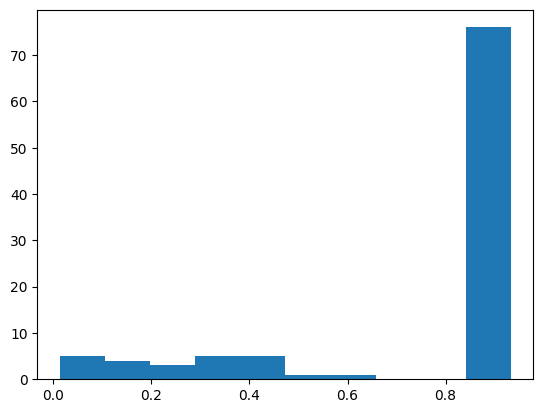

In [6]:
plt.hist(Err_dR_dC)
plt.show()     

In [6]:
print(Err_dR_dC)

[0.94467944 0.93925845 0.93355666 0.94475196 0.93872781 0.93502154
 0.93660271 0.94960623 0.93487888 0.94330511 0.93444055 0.94108209
 0.93617071 0.93374298 0.94600707 0.93665227 0.94027223 0.93540747
 0.93907726 0.93988516 0.93540635 0.93563217 0.95143742 0.93444558
 0.93673266 0.94875651 0.9368373  0.94875587 0.93533729 0.9424265
 0.94106803 0.93769843 0.93681404 0.94072477 0.94073151 0.93526758
 0.94435034 0.94121549 0.93292782 0.9377851  0.93829875 0.93843694
 0.93544518 0.94119382 0.95075704 0.95112641 0.9423451  0.9463781
 0.93781383 0.94145647 0.93947151 0.93323012 0.94534948 0.93309959
 0.93569259 0.93365436 0.93776853 0.94095197 0.93618988 0.93553211
 0.93702574 0.94136604 0.94242032 0.94888284 0.93887132 0.94930969
 0.93379958 0.94220882 0.93501392 0.94119737 0.93520496 0.94708616
 0.93999607 0.93949493 0.94016385 0.9379374  0.93700678 0.93652051
 0.94088977 0.93705335 0.93499426 0.93854049 0.9420693  0.94134783
 0.94316259 0.93791191 0.93556355 0.93414452 0.94553829 0.948502

In [7]:
d_R

array([1.79561936, 1.63536597, 1.49502825, 1.79797627, 1.62120324,
       1.52873215, 1.5668598 , 1.97116968, 1.52538326, 1.75209199,
       1.51518448, 1.68598412, 1.5562553 , 1.49923242, 1.83977178,
       1.56808568, 1.66312361, 1.53786604, 1.63050232, 1.65241511,
       1.53783955, 1.54323464, 2.04549805, 1.51530084, 1.57007809,
       1.93848351, 1.57267914, 1.93845939, 1.53619706, 1.72535391,
       1.68558197, 1.59441682, 1.57210034, 1.67582075, 1.67601144,
       1.53454277, 1.78500026, 1.68981031, 1.48101145, 1.59663788,
       1.60992947, 1.61354344, 1.53876446, 1.6891874 , 2.01723586,
       2.03248148, 1.72291798, 1.85250167, 1.59737563, 1.69676576,
       1.64112242, 1.48771667, 1.81763449, 1.4848141 , 1.54468467,
       1.49722972, 1.5962127 , 1.68226895, 1.55672269, 1.54083929,
       1.57738532, 1.69414889, 1.72516885, 1.94327431, 1.62500929,
       1.95963807, 1.50051412, 1.71885507, 1.52855294, 1.6892894 ,
       1.53305977, 1.8772909 , 1.65546921, 1.64175763, 1.66011

In [8]:
d_C


array([0.09933467, 0.09933467, 0.09933467, 0.09933467, 0.09933467,
       0.09933467, 0.09933467, 0.09933467, 0.09933467, 0.09933467,
       0.09933467, 0.09933467, 0.09933467, 0.09933467, 0.09933467,
       0.09933467, 0.09933467, 0.09933467, 0.09933467, 0.09933467,
       0.09933467, 0.09933467, 0.09933467, 0.09933467, 0.09933467,
       0.09933467, 0.09933467, 0.09933467, 0.09933467, 0.09933467,
       0.09933467, 0.09933467, 0.09933467, 0.09933467, 0.09933467,
       0.09933467, 0.09933467, 0.09933467, 0.09933467, 0.09933467,
       0.09933467, 0.09933467, 0.09933467, 0.09933467, 0.09933467,
       0.09933467, 0.09933467, 0.09933467, 0.09933467, 0.09933467,
       0.09933467, 0.09933467, 0.09933467, 0.09933467, 0.09933467,
       0.09933467, 0.09933467, 0.09933467, 0.09933467, 0.09933467,
       0.09933467, 0.09933467, 0.09933467, 0.09933467, 0.09933467,
       0.09933467, 0.09933467, 0.09933467, 0.09933467, 0.09933467,
       0.09933467, 0.09933467, 0.09933467, 0.09933467, 0.09933